##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## 설정

### 모듈 구성 및 임포트

In [1]:
# efficientNet 블락 목록

content_layers = ['block7d_expand_conv',
                'block7d_expand_bn',
                'block7d_expand_activation',
                'block7d_dwconv',
                'block7d_bn',
                'block7d_activation',
                'block7d_se_squeeze',
                'block7d_se_reshape',
                'block7d_se_reduce',
                'block7d_se_expand',
                'block7d_se_excite',
                'block7d_project_conv',
                'block7d_project_bn',
                'block7d_drop',
                'block7d_add'] 

style_layers = ['stem_conv_pad',
                'stem_conv',
                'stem_bn',
                'stem_activation',
                'block1a_dwconv',
                'block1a_bn',
                'block1a_activation',
                'block1a_se_squeeze',
                'block1a_se_reshape',
                'block1a_se_reduce',
                'block1a_se_expand',
                'block1a_se_excite',
                'block1a_project_conv',
                'block1a_project_bn',
                'block1b_dwconv',
                'block1b_bn',
                'block1b_activation',
                'block1b_se_squeeze',
                'block1b_se_reshape',
                'block1b_se_reduce',
                'block1b_se_expand',
                'block1b_se_excite',
                'block1b_project_conv',
                'block1b_project_bn',
                'block1b_drop',
                'block1b_add',
                'block1c_dwconv',
                'block1c_bn',
                'block1c_activation',
                'block1c_se_squeeze',
                'block1c_se_reshape',
                'block1c_se_reduce',
                'block1c_se_expand',
                'block1c_se_excite',
                'block1c_project_conv',
                'block1c_project_bn',
                'block1c_drop',
                'block1c_add',
                'block1d_dwconv',
                'block1d_bn',
                'block1d_activation',
                'block1d_se_squeeze',
                'block1d_se_reshape',
                'block1d_se_reduce',
                'block1d_se_expand',
                'block1d_se_excite',
                'block1d_project_conv',
                'block1d_project_bn',
                'block1d_drop',
                'block1d_add',
                'block2a_expand_conv',
                'block2a_expand_bn',
                'block2a_expand_activation',
                'block2a_dwconv_pad',
                'block2a_dwconv',
                'block2a_bn',
                'block2a_activation',
                'block2a_se_squeeze',
                'block2a_se_reshape',
                'block2a_se_reduce',
                'block2a_se_expand',
                'block2a_se_excite',
                'block2a_project_conv',
                'block2a_project_bn',
                'block2b_expand_conv',
                'block2b_expand_bn',
                'block2b_expand_activation',
                'block2b_dwconv',
                'block2b_bn',
                'block2b_activation',
                'block2b_se_squeeze',
                'block2b_se_reshape',
                'block2b_se_reduce',
                'block2b_se_expand',
                'block2b_se_excite',
                'block2b_project_conv',
                'block2b_project_bn',
                'block2b_drop',
                'block2b_add',
                'block2c_expand_conv',
                'block2c_expand_bn',
                'block2c_expand_activation',
                'block2c_dwconv',
                'block2c_bn',
                'block2c_activation',
                'block2c_se_squeeze',
                'block2c_se_reshape',
                'block2c_se_reduce',
                'block2c_se_expand',
                'block2c_se_excite',
                'block2c_project_conv',
                'block2c_project_bn',
                'block2c_drop',
                'block2c_add',
                'block2d_expand_conv',
                'block2d_expand_bn',
                'block2d_expand_activation',
                'block2d_dwconv',
                'block2d_bn',
                'block2d_activation',
                'block2d_se_squeeze',
                'block2d_se_reshape',
                'block2d_se_reduce',
                'block2d_se_expand',
                'block2d_se_excite',
                'block2d_project_conv',
                'block2d_project_bn',
                'block2d_drop',
                'block2d_add',
                'block2e_expand_conv',
                'block2e_expand_bn',
                'block2e_expand_activation',
                'block2e_dwconv',
                'block2e_bn',
                'block2e_activation',
                'block2e_se_squeeze',
                'block2e_se_reshape',
                'block2e_se_reduce',
                'block2e_se_expand',
                'block2e_se_excite',
                'block2e_project_conv',
                'block2e_project_bn',
                'block2e_drop',
                'block2e_add',
                'block2f_expand_conv',
                'block2f_expand_bn',
                'block2f_expand_activation',
                'block2f_dwconv',
                'block2f_bn',
                'block2f_activation',
                'block2f_se_squeeze',
                'block2f_se_reshape',
                'block2f_se_reduce',
                'block2f_se_expand',
                'block2f_se_excite',
                'block2f_project_conv',
                'block2f_project_bn',
                'block2f_drop',
                'block2f_add',
                'block2g_expand_conv',
                'block2g_expand_bn',
                'block2g_expand_activation',
                'block2g_dwconv',
                'block2g_bn',
                'block2g_activation',
                'block2g_se_squeeze',
                'block2g_se_reshape',
                'block2g_se_reduce',
                'block2g_se_expand',
                'block2g_se_excite',
                'block2g_project_conv',
                'block2g_project_bn',
                'block2g_drop',
                'block2g_add',
                'block3a_expand_conv',
                'block3a_expand_bn',
                'block3a_expand_activation',
                'block3a_dwconv_pad',
                'block3a_dwconv',
                'block3a_bn',
                'block3a_activation',
                'block3a_se_squeeze',
                'block3a_se_reshape',
                'block3a_se_reduce',
                'block3a_se_expand',
                'block3a_se_excite',
                'block3a_project_conv',
                'block3a_project_bn',
                'block3b_expand_conv',
                'block3b_expand_bn',
                'block3b_expand_activation',
                'block3b_dwconv',
                'block3b_bn',
                'block3b_activation',
                'block3b_se_squeeze',
                'block3b_se_reshape',
                'block3b_se_reduce',
                'block3b_se_expand',
                'block3b_se_excite',
                'block3b_project_conv',
                'block3b_project_bn',
                'block3b_drop',
                'block3b_add',
                'block3c_expand_conv',
                'block3c_expand_bn',
                'block3c_expand_activation',
                'block3c_dwconv',
                'block3c_bn',
                'block3c_activation',
                'block3c_se_squeeze',
                'block3c_se_reshape',
                'block3c_se_reduce',
                'block3c_se_expand',
                'block3c_se_excite',
                'block3c_project_conv',
                'block3c_project_bn',
                'block3c_drop',
                'block3c_add',
                'block3d_expand_conv',
                'block3d_expand_bn',
                'block3d_expand_activation',
                'block3d_dwconv',
                'block3d_bn',
                'block3d_activation',
                'block3d_se_squeeze',
                'block3d_se_reshape',
                'block3d_se_reduce',
                'block3d_se_expand',
                'block3d_se_excite',
                'block3d_project_conv',
                'block3d_project_bn',
                'block3d_drop',
                'block3d_add',
                'block3e_expand_conv',
                'block3e_expand_bn',
                'block3e_expand_activation',
                'block3e_dwconv',
                'block3e_bn',
                'block3e_activation',
                'block3e_se_squeeze',
                'block3e_se_reshape',
                'block3e_se_reduce',
                'block3e_se_expand',
                'block3e_se_excite',
                'block3e_project_conv',
                'block3e_project_bn',
                'block3e_drop',
                'block3e_add',
                'block3f_expand_conv',
                'block3f_expand_bn',
                'block3f_expand_activation',
                'block3f_dwconv',
                'block3f_bn',
                'block3f_activation',
                'block3f_se_squeeze',
                'block3f_se_reshape',
                'block3f_se_reduce',
                'block3f_se_expand',
                'block3f_se_excite',
                'block3f_project_conv',
                'block3f_project_bn',
                'block3f_drop',
                'block3f_add',
                'block3g_expand_conv',
                'block3g_expand_bn',
                'block3g_expand_activation',
                'block3g_dwconv',
                'block3g_bn',
                'block3g_activation',
                'block3g_se_squeeze',
                'block3g_se_reshape',
                'block3g_se_reduce',
                'block3g_se_expand',
                'block3g_se_excite',
                'block3g_project_conv',
                'block3g_project_bn',
                'block3g_drop',
                'block3g_add',
                'block4a_expand_conv',
                'block4a_expand_bn',
                'block4a_expand_activation',
                'block4a_dwconv_pad',
                'block4a_dwconv',
                'block4a_bn',
                'block4a_activation',
                'block4a_se_squeeze',
                'block4a_se_reshape',
                'block4a_se_reduce',
                'block4a_se_expand',
                'block4a_se_excite',
                'block4a_project_conv',
                'block4a_project_bn',
                'block4b_expand_conv',
                'block4b_expand_bn',
                'block4b_expand_activation',
                'block4b_dwconv',
                'block4b_bn',
                'block4b_activation',
                'block4b_se_squeeze',
                'block4b_se_reshape',
                'block4b_se_reduce',
                'block4b_se_expand',
                'block4b_se_excite',
                'block4b_project_conv',
                'block4b_project_bn',
                'block4b_drop',
                'block4b_add',
                'block4c_expand_conv',
                'block4c_expand_bn',
                'block4c_expand_activation',
                'block4c_dwconv',
                'block4c_bn',
                'block4c_activation',
                'block4c_se_squeeze',
                'block4c_se_reshape',
                'block4c_se_reduce',
                'block4c_se_expand',
                'block4c_se_excite',
                'block4c_project_conv',
                'block4c_project_bn',
                'block4c_drop',
                'block4c_add',
                'block4d_expand_conv',
                'block4d_expand_bn',
                'block4d_expand_activation',
                'block4d_dwconv',
                'block4d_bn',
                'block4d_activation',
                'block4d_se_squeeze',
                'block4d_se_reshape',
                'block4d_se_reduce',
                'block4d_se_expand',
                'block4d_se_excite',
                'block4d_project_conv',
                'block4d_project_bn',
                'block4d_drop',
                'block4d_add',
                'block4e_expand_conv',
                'block4e_expand_bn',
                'block4e_expand_activation',
                'block4e_dwconv',
                'block4e_bn',
                'block4e_activation',
                'block4e_se_squeeze',
                'block4e_se_reshape',
                'block4e_se_reduce',
                'block4e_se_expand',
                'block4e_se_excite',
                'block4e_project_conv',
                'block4e_project_bn',
                'block4e_drop',
                'block4e_add',
                'block4f_expand_conv',
                'block4f_expand_bn',
                'block4f_expand_activation',
                'block4f_dwconv',
                'block4f_bn',
                'block4f_activation',
                'block4f_se_squeeze',
                'block4f_se_reshape',
                'block4f_se_reduce',
                'block4f_se_expand',
                'block4f_se_excite',
                'block4f_project_conv',
                'block4f_project_bn',
                'block4f_drop',
                'block4f_add',
                'block4g_expand_conv',
                'block4g_expand_bn',
                'block4g_expand_activation',
                'block4g_dwconv',
                'block4g_bn',
                'block4g_activation',
                'block4g_se_squeeze',
                'block4g_se_reshape',
                'block4g_se_reduce',
                'block4g_se_expand',
                'block4g_se_excite',
                'block4g_project_conv',
                'block4g_project_bn',
                'block4g_drop',
                'block4g_add',
                'block4h_expand_conv',
                'block4h_expand_bn',
                'block4h_expand_activation',
                'block4h_dwconv',
                'block4h_bn',
                'block4h_activation',
                'block4h_se_squeeze',
                'block4h_se_reshape',
                'block4h_se_reduce',
                'block4h_se_expand',
                'block4h_se_excite',
                'block4h_project_conv',
                'block4h_project_bn',
                'block4h_drop',
                'block4h_add',
                'block4i_expand_conv',
                'block4i_expand_bn',
                'block4i_expand_activation',
                'block4i_dwconv',
                'block4i_bn',
                'block4i_activation',
                'block4i_se_squeeze',
                'block4i_se_reshape',
                'block4i_se_reduce',
                'block4i_se_expand',
                'block4i_se_excite',
                'block4i_project_conv',
                'block4i_project_bn',
                'block4i_drop',
                'block4i_add',
                'block4j_expand_conv',
                'block4j_expand_bn',
                'block4j_expand_activation',
                'block4j_dwconv',
                'block4j_bn',
                'block4j_activation',
                'block4j_se_squeeze',
                'block4j_se_reshape',
                'block4j_se_reduce',
                'block4j_se_expand',
                'block4j_se_excite',
                'block4j_project_conv',
                'block4j_project_bn',
                'block4j_drop',
                'block4j_add',
                'block5a_expand_conv',
                'block5a_expand_bn',
                'block5a_expand_activation',
                'block5a_dwconv',
                'block5a_bn',
                'block5a_activation',
                'block5a_se_squeeze',
                'block5a_se_reshape',
                'block5a_se_reduce',
                'block5a_se_expand',
                'block5a_se_excite',
                'block5a_project_conv',
                'block5a_project_bn',
                'block5b_expand_conv',
                'block5b_expand_bn',
                'block5b_expand_activation',
                'block5b_dwconv',
                'block5b_bn',
                'block5b_activation',
                'block5b_se_squeeze',
                'block5b_se_reshape',
                'block5b_se_reduce',
                'block5b_se_expand',
                'block5b_se_excite',
                'block5b_project_conv',
                'block5b_project_bn',
                'block5b_drop',
                'block5b_add',
                'block5c_expand_conv',
                'block5c_expand_bn',
                'block5c_expand_activation',
                'block5c_dwconv',
                'block5c_bn',
                'block5c_activation',
                'block5c_se_squeeze',
                'block5c_se_reshape',
                'block5c_se_reduce',
                'block5c_se_expand',
                'block5c_se_excite',
                'block5c_project_conv',
                'block5c_project_bn',
                'block5c_drop',
                'block5c_add',
                'block5d_expand_conv',
                'block5d_expand_bn',
                'block5d_expand_activation',
                'block5d_dwconv',
                'block5d_bn',
                'block5d_activation',
                'block5d_se_squeeze',
                'block5d_se_reshape',
                'block5d_se_reduce',
                'block5d_se_expand',
                'block5d_se_excite',
                'block5d_project_conv',
                'block5d_project_bn',
                'block5d_drop',
                'block5d_add',
                'block5e_expand_conv',
                'block5e_expand_bn',
                'block5e_expand_activation',
                'block5e_dwconv',
                'block5e_bn',
                'block5e_activation',
                'block5e_se_squeeze',
                'block5e_se_reshape',
                'block5e_se_reduce',
                'block5e_se_expand',
                'block5e_se_excite',
                'block5e_project_conv',
                'block5e_project_bn',
                'block5e_drop',
                'block5e_add',
                'block5f_expand_conv',
                'block5f_expand_bn',
                'block5f_expand_activation',
                'block5f_dwconv',
                'block5f_bn',
                'block5f_activation',
                'block5f_se_squeeze',
                'block5f_se_reshape',
                'block5f_se_reduce',
                'block5f_se_expand',
                'block5f_se_excite',
                'block5f_project_conv',
                'block5f_project_bn',
                'block5f_drop',
                'block5f_add',
                'block5g_expand_conv',
                'block5g_expand_bn',
                'block5g_expand_activation',
                'block5g_dwconv',
                'block5g_bn',
                'block5g_activation',
                'block5g_se_squeeze',
                'block5g_se_reshape',
                'block5g_se_reduce',
                'block5g_se_expand',
                'block5g_se_excite',
                'block5g_project_conv',
                'block5g_project_bn',
                'block5g_drop',
                'block5g_add',
                'block5h_expand_conv',
                'block5h_expand_bn',
                'block5h_expand_activation',
                'block5h_dwconv',
                'block5h_bn',
                'block5h_activation',
                'block5h_se_squeeze',
                'block5h_se_reshape',
                'block5h_se_reduce',
                'block5h_se_expand',
                'block5h_se_excite',
                'block5h_project_conv',
                'block5h_project_bn',
                'block5h_drop',
                'block5h_add',
                'block5i_expand_conv',
                'block5i_expand_bn',
                'block5i_expand_activation',
                'block5i_dwconv',
                'block5i_bn',
                'block5i_activation',
                'block5i_se_squeeze',
                'block5i_se_reshape',
                'block5i_se_reduce',
                'block5i_se_expand',
                'block5i_se_excite',
                'block5i_project_conv',
                'block5i_project_bn',
                'block5i_drop',
                'block5i_add',
                'block5j_expand_conv',
                'block5j_expand_bn',
                'block5j_expand_activation',
                'block5j_dwconv',
                'block5j_bn',
                'block5j_activation',
                'block5j_se_squeeze',
                'block5j_se_reshape',
                'block5j_se_reduce',
                'block5j_se_expand',
                'block5j_se_excite',
                'block5j_project_conv',
                'block5j_project_bn',
                'block5j_drop',
                'block5j_add',
                'block6a_expand_conv',
                'block6a_expand_bn',
                'block6a_expand_activation',
                'block6a_dwconv_pad',
                'block6a_dwconv',
                'block6a_bn',
                'block6a_activation',
                'block6a_se_squeeze',
                'block6a_se_reshape',
                'block6a_se_reduce',
                'block6a_se_expand',
                'block6a_se_excite',
                'block6a_project_conv',
                'block6a_project_bn',
                'block6b_expand_conv',
                'block6b_expand_bn',
                'block6b_expand_activation',
                'block6b_dwconv',
                'block6b_bn',
                'block6b_activation',
                'block6b_se_squeeze',
                'block6b_se_reshape',
                'block6b_se_reduce',
                'block6b_se_expand',
                'block6b_se_excite',
                'block6b_project_conv',
                'block6b_project_bn',
                'block6b_drop',
                'block6b_add',
                'block6c_expand_conv',
                'block6c_expand_bn',
                'block6c_expand_activation',
                'block6c_dwconv',
                'block6c_bn',
                'block6c_activation',
                'block6c_se_squeeze',
                'block6c_se_reshape',
                'block6c_se_reduce',
                'block6c_se_expand',
                'block6c_se_excite',
                'block6c_project_conv',
                'block6c_project_bn',
                'block6c_drop',
                'block6c_add',
                'block6d_expand_conv',
                'block6d_expand_bn',
                'block6d_expand_activation',
                'block6d_dwconv',
                'block6d_bn',
                'block6d_activation',
                'block6d_se_squeeze',
                'block6d_se_reshape',
                'block6d_se_reduce',
                'block6d_se_expand',
                'block6d_se_excite',
                'block6d_project_conv',
                'block6d_project_bn',
                'block6d_drop',
                'block6d_add',
                'block6e_expand_conv',
                'block6e_expand_bn',
                'block6e_expand_activation',
                'block6e_dwconv',
                'block6e_bn',
                'block6e_activation',
                'block6e_se_squeeze',
                'block6e_se_reshape',
                'block6e_se_reduce',
                'block6e_se_expand',
                'block6e_se_excite',
                'block6e_project_conv',
                'block6e_project_bn',
                'block6e_drop',
                'block6e_add',
                'block6f_expand_conv',
                'block6f_expand_bn',
                'block6f_expand_activation',
                'block6f_dwconv',
                'block6f_bn',
                'block6f_activation',
                'block6f_se_squeeze',
                'block6f_se_reshape',
                'block6f_se_reduce',
                'block6f_se_expand',
                'block6f_se_excite',
                'block6f_project_conv',
                'block6f_project_bn',
                'block6f_drop',
                'block6f_add',
                'block6g_expand_conv',
                'block6g_expand_bn',
                'block6g_expand_activation',
                'block6g_dwconv',
                'block6g_bn',
                'block6g_activation',
                'block6g_se_squeeze',
                'block6g_se_reshape',
                'block6g_se_reduce',
                'block6g_se_expand',
                'block6g_se_excite',
                'block6g_project_conv',
                'block6g_project_bn',
                'block6g_drop',
                'block6g_add',
                'block6h_expand_conv',
                'block6h_expand_bn',
                'block6h_expand_activation',
                'block6h_dwconv',
                'block6h_bn',
                'block6h_activation',
                'block6h_se_squeeze',
                'block6h_se_reshape',
                'block6h_se_reduce',
                'block6h_se_expand',
                'block6h_se_excite',
                'block6h_project_conv',
                'block6h_project_bn',
                'block6h_drop',
                'block6h_add',
                'block6i_expand_conv',
                'block6i_expand_bn',
                'block6i_expand_activation',
                'block6i_dwconv',
                'block6i_bn',
                'block6i_activation',
                'block6i_se_squeeze',
                'block6i_se_reshape',
                'block6i_se_reduce',
                'block6i_se_expand',
                'block6i_se_excite',
                'block6i_project_conv',
                'block6i_project_bn',
                'block6i_drop',
                'block6i_add',
                'block6j_expand_conv',
                'block6j_expand_bn',
                'block6j_expand_activation',
                'block6j_dwconv',
                'block6j_bn',
                'block6j_activation',
                'block6j_se_squeeze',
                'block6j_se_reshape',
                'block6j_se_reduce',
                'block6j_se_expand',
                'block6j_se_excite',
                'block6j_project_conv',
                'block6j_project_bn',
                'block6j_drop',
                'block6j_add',
                'block6k_expand_conv',
                'block6k_expand_bn',
                'block6k_expand_activation',
                'block6k_dwconv',
                'block6k_bn',
                'block6k_activation',
                'block6k_se_squeeze',
                'block6k_se_reshape',
                'block6k_se_reduce',
                'block6k_se_expand',
                'block6k_se_excite',
                'block6k_project_conv',
                'block6k_project_bn',
                'block6k_drop',
                'block6k_add',
                'block6l_expand_conv',
                'block6l_expand_bn',
                'block6l_expand_activation',
                'block6l_dwconv',
                'block6l_bn',
                'block6l_activation',
                'block6l_se_squeeze',
                'block6l_se_reshape',
                'block6l_se_reduce',
                'block6l_se_expand',
                'block6l_se_excite',
                'block6l_project_conv',
                'block6l_project_bn',
                'block6l_drop',
                'block6l_add',
                'block6m_expand_conv',
                'block6m_expand_bn',
                'block6m_expand_activation',
                'block6m_dwconv',
                'block6m_bn',
                'block6m_activation',
                'block6m_se_squeeze',
                'block6m_se_reshape',
                'block6m_se_reduce',
                'block6m_se_expand',
                'block6m_se_excite',
                'block6m_project_conv',
                'block6m_project_bn',
                'block6m_drop',
                'block6m_add',
                'block7a_expand_conv',
                'block7a_expand_bn',
                'block7a_expand_activation',
                'block7a_dwconv',
                'block7a_bn',
                'block7a_activation',
                'block7a_se_squeeze',
                'block7a_se_reshape',
                'block7a_se_reduce',
                'block7a_se_expand',
                'block7a_se_excite',
                'block7a_project_conv',
                'block7a_project_bn',
                'block7b_expand_conv',
                'block7b_expand_bn',
                'block7b_expand_activation',
                'block7b_dwconv',
                'block7b_bn',
                'block7b_activation',
                'block7b_se_squeeze',
                'block7b_se_reshape',
                'block7b_se_reduce',
                'block7b_se_expand',
                'block7b_se_excite',
                'block7b_project_conv',
                'block7b_project_bn',
                'block7b_drop',
                'block7b_add',
                'block7c_expand_conv',
                'block7c_expand_bn',
                'block7c_expand_activation',
                'block7c_dwconv',
                'block7c_bn',
                'block7c_activation',
                'block7c_se_squeeze',
                'block7c_se_reshape',
                'block7c_se_reduce',
                'block7c_se_expand',
                'block7c_se_excite',
                'block7c_project_conv',
                'block7c_project_bn',
                'block7c_drop',
                'block7c_add']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [2]:
# 현재 경로에 있는 폴더 또는 파일명

import os
for file in os.listdir(os.getcwd()):
   print(file)

.config
sample_data


In [3]:
import glob

path = "./*.png"   # 현재 directory에서 .png로 끝나는 모든 파일명
file_list = glob.glob(path)
file_list

[]

In [4]:
# 배열 csv로 저장

import numpy as np

array = [[1,2,3]]
np.savetxt('file.csv', array, delimiter=',') # delimiter 기준으로 단위를 끊음

In [5]:
# csv 배열로 가져오기

import csv

with open('file.csv', 'r', newline='\n') as file: # newline은 파일을 읽고 쓸 때 줄바꿈 처리 방법을 나타냄. \n, \r, \r\n, None 중 하나
  reader = csv.reader(file, delimiter=',')
  for rows in reader:
    print(rows)

['1.000000000000000000e+00', '2.000000000000000000e+00', '3.000000000000000000e+00']


In [6]:
# csv pandas 객체로 가져오기

import pandas as pd
data = pd.read_csv('file.csv')

data.head()

,1.000000000000000000e+00,2.000000000000000000e+00,3.000000000000000000e+00


In [7]:
import tensorflow as tf
#✅ 글카 없는 사람: 아래 세줄 & 아래 블럭 주석처리
from numba import cuda 
device = cuda.get_current_device()
device.reset()

CudaSupportError: ignored

In [8]:
tf.debugging.set_log_device_placement(False)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작 시 메모리 증가 설정
    print(e)

In [9]:
from google.colab import drive
drive.mount('/content/drive') #✅1) 이 경로도 통일해야할듯 ✅2) 매번 mount 시 authorization code 복붙해야 하는거 자동화 HOW?

Mounted at /content/drive


In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
#vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')

In [ ]:
efficient = tf.keras.applications.efficientnet.EfficientNetB7(include_top=True, weights='imagenet')

In [ ]:
# 변수 정의
count = 2    #변환할 이미지 개수 + 1
temp_num = 1 #변환할 이미지 서수(몇번째)
content_path = f'/content/character_zombie_walk0.png' #✅ 경로 문자열 ''|"" 종류 통일 필요
style_path = '/content/crater.jpg'
threshold = 160 #배경 제거 시 사용할 임계값

In [ ]:
# 변환 대상 이미지 경로 list 생성
image_list = []

for i in range(1, count):
  content_name = f'/content/character_zombie_walk0.png'
  image_list.append(content_name)

image_list

## 입력 시각화

이미지를 불러오는 함수를 정의하고, 최대 이미지 크기를 512개의 픽셀로 제한합니다.

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

이미지를 출력하기 위한 간단한 함수를 정의합니다:

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

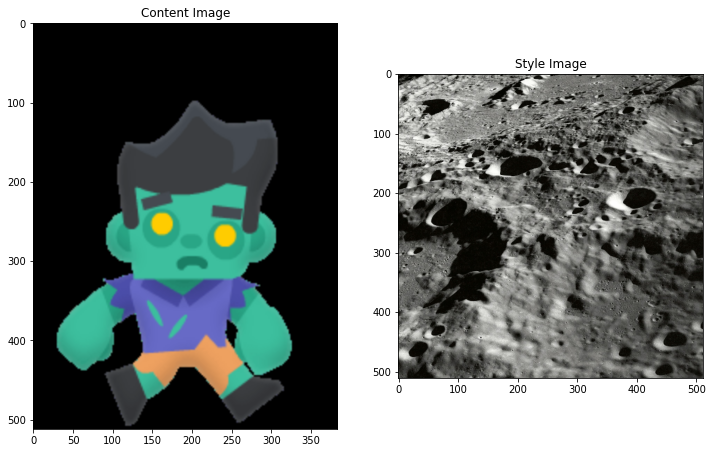

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

## 콘텐츠와 스타일 표현 정의하기

이미지의 콘텐츠와 스타일 표현(representation)을 얻기 위해 모델의 몇 가지 중간층들을 살펴봅니다. <br>
모델의 입력층부터 시작해서 처음 몇 개의 층은 선분이나 질감과 같은 이미지 내의 저차원적 특성에 반응합니다. <br>
반면, 네트워크가 깊어지면 최종 몇 개의 층은 *바퀴* 나 *눈* 과 같은 고차원적 특성들을 나타냅니다. <br>
Base Model은 사전학습된 이미지 분류 네트워크인 VGG19 네트워크의 구조를 사용합니다. <br>
이 중간층들은 이미지에서 콘텐츠와 스타일 표현을 정의하는 데 필요합니다.<br>
입력 이미지가 주어졌을 때, 스타일 전이 알고리즘은 이 중간층들에서 콘텐츠와 스타일에 해당하는 타깃 표현들을 일치시켜 나갈 것입니다.


In [ ]:
"""
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
prediction_probabilities = vgg(x)
prediction_probabilities.shape
"""

'\nx = tf.keras.applications.vgg19.preprocess_input(content_image*255)\nx = tf.image.resize(x, (224, 224))\nprediction_probabilities = vgg(x)\nprediction_probabilities.shape\n'

In [ ]:
x = tf.keras.applications.efficientnet.preprocess_input(content_image*255)
x = tf.image.resize(x, (600, 600))
prediction_probabilities = efficient(x)
prediction_probabilities.shape

TensorShape([1, 1000])

[VGG19](https://keras.io/applications/#vgg19) 모델을 불러오고 작동 여부를 확인하기 위해 이미지에 적용시켜봅니다.

In [ ]:
"""
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]
"""

'\npredicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]\n[(class_name, prob) for (number, class_name, prob) in predicted_top_5]\n'

In [ ]:
predicted_top_5 = tf.keras.applications.efficientnet.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('teddy', 0.07022683),
 ('rubber_eraser', 0.04901866),
 ('hair_slide', 0.031492382),
 ('joystick', 0.02657985),
 ('Band_Aid', 0.02597448)]

이제 분류층을 제외한 `VGG19` 모델을 불러오고 각 층의 이름을 출력해봅니다.

In [ ]:
"""
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)
  """

"\nvgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')\n\nprint()\nfor layer in vgg.layers:\n  print(layer.name)\n  "

In [ ]:
efficient = tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet')

print()
for layer in efficient.layers:
  print(layer.name)


input_2
rescaling_1
normalization_1
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block1b_dwconv
block1b_bn
block1b_activation
block1b_se_squeeze
block1b_se_reshape
block1b_se_reduce
block1b_se_expand
block1b_se_excite
block1b_project_conv
block1b_project_bn
block1b_drop
block1b_add
block1c_dwconv
block1c_bn
block1c_activation
block1c_se_squeeze
block1c_se_reshape
block1c_se_reduce
block1c_se_expand
block1c_se_excite
block1c_project_conv
block1c_project_bn
block1c_drop
block1c_add
block1d_dwconv
block1d_bn
block1d_activation
block1d_se_squeeze
block1d_se_reshape
block1d_se_reduce
block1d_se_expand
block1d_se_excite
block1d_project_conv
block1d_project_bn
block1d_drop
block1d_add
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
bloc

이미지의 스타일과 콘텐츠를 나타내기 위한 모델의 중간층들을 선택합니다.

In [ ]:
#content_layers = ['block5_conv2'] 

#style_layers = ['block1_conv1',
#                'block2_conv1',
#                'block3_conv1', 
#                'block4_conv1', 
#                'block5_conv1']

#num_content_layers = len(content_layers)
#num_style_layers = len(style_layers)

In [ ]:
content_layers = ['top_conv'] 

style_layers = ['stem_conv_pad',
                'stem_conv',
                'block1a_dwconv',
                'block1a_project_conv',
                'block1b_dwconv',
                'block1b_project_conv',
                'block1c_dwconv',
                'block1c_project_conv',
                'block1d_dwconv',
                'block1d_project_conv',
                'block2a_dwconv',
                'block2a_project_conv',
                'block2b_dwconv',
                'block2b_project_conv',
                'block2c_dwconv',
                'block2c_project_conv',
                'block2d_dwconv',
                'block2d_project_conv',
                'block2e_dwconv',
                'block2e_project_conv',
                'block2f_dwconv',
                'block2f_project_conv',
                'block2g_dwconv',
                'block2g_project_conv',
                'block3a_dwconv',
                'block3a_project_conv',
                'block3b_dwconv',
                'block3b_project_conv',
                'block3c_dwconv',
                'block3c_project_conv',
                'block3d_dwconv',
                'block3d_project_conv',
                'block3e_dwconv',
                'block3e_project_conv',
                'block3f_dwconv',
                'block3f_project_conv',
                'block3g_dwconv',
                'block3g_project_conv',
                'block4a_dwconv',
                'block4a_project_conv',
                'block4b_dwconv',
                'block4b_project_conv',
                'block4c_dwconv',
                'block4c_project_conv',
                'block4d_dwconv',
                'block4d_project_conv',
                'block4e_dwconv',
                'block4e_project_conv',
                'block4f_dwconv',
                'block4f_project_conv',
                'block4g_dwconv',
                'block4g_project_conv',
                'block4h_dwconv', 
                'block4h_project_conv',
                'block4i_dwconv',
                'block4i_project_conv',
                'block4j_dwconv',
                'block4j_project_conv',
                'block5a_dwconv',
                'block5a_project_conv',
                'block5b_dwconv',
                'block5b_project_conv',
                'block5c_dwconv',
                'block5c_project_conv',
                'block5d_dwconv',
                'block5d_project_conv',
                'block5e_dwconv',
                'block5e_project_conv',
                'block5f_dwconv',
                'block5f_project_conv',
                'block5g_dwconv',
                'block5g_project_conv',
                'block5h_dwconv', 
                'block5h_project_conv',
                'block5i_dwconv',
                'block5i_project_conv',
                'block5j_dwconv',
                'block5j_project_conv',
                'block6a_dwconv',
                'block6a_project_conv',
                'block6b_dwconv',
                'block6b_project_conv',
                'block6c_dwconv',
                'block6c_project_conv',
                'block6d_dwconv',
                'block6d_project_conv',
                'block6e_dwconv',
                'block6e_project_conv',
                'block6f_dwconv',
                'block6f_project_conv',
                'block6g_dwconv',
                'block6g_project_conv',
                'block6h_dwconv', 
                'block6h_project_conv',
                'block6i_dwconv',
                'block6i_project_conv',
                'block6j_dwconv',
                'block6j_project_conv',
                'block6k_dwconv',
                'block6k_project_conv',
                'block6l_dwconv',
                'block6l_project_conv',
                'block6m_dwconv',
                'block6m_project_conv',
                'block7a_dwconv',
                'block7a_project_conv',
                'block7b_dwconv',
                'block7b_project_conv',
                'block7c_dwconv',
                'block7c_project_conv',
                'block7d_dwconv',
                'block7d_project_conv']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

### 스타일과 콘텐츠를 위한 중간층

사전훈련된 이미지 분류 네트워크 속에 있는 중간 출력으로 어떻게 스타일과 콘텐츠 표현을 정의할 수 있을까요?

고수준에서 보면 이미지 분류(네트워크의 훈련 목적)를 수행하기 위해서는 네트워크가 반드시 이미지를 이해하여야 합니다. 이 과정에는 미가공 이미지를 입력으로 받아 픽셀값들을 이미지 내 특성(feature)들에 대한 복합적인 이해로 변환할 수 있는 내부 표현(internal representation)을 만드는 작업이 포함됩니다. 또한 왜 합성곱(convolutional) 신경망의 일반화(generalize)가 쉽게 가능한지를 알 수 있습니다. 합성곱 신경망은 배경잡음(background noise)과 기타잡음(nuisances)에 상관없이(고양이와 강아지처럼 - ✅무슨 뜻이지?) 클래스 안에 있는 불변성(invariance)과 특징을 포착할 수 있습니다.

따라서 모델은 미가공 이미지의 입력과 분류 레이블(label)의 출력 중간에서 복합 특성(complex feature) 추출기의 역할을 수행합니다. <br>
그러므로 모델의 중간층에 접근함으로써 입력 이미지의 콘텐츠와 스타일을 추출할 수 있습니다.

## 모델 만들기 

`tf.keras.applications`에서 제공하는 모델들은 keras 함수형 API를 통해 중간층에 쉽게 접근할 수 있습니다.

함수형 API를 이용해 모델을 정의하기 위해 모델의 입력 및 출력을 지정합니다.

`model = Model(inputs, outputs)`

아래 함수는 중간층들의 결과물을 배열 형태로 출력하는 `VGG19` 모델을 반환합니다.

In [ ]:
""" 중간층의 출력값을 배열로 반환하는 vgg 모델 반환"""
"""
def vgg_layers(layer_names):
  # 이미지넷 데이터셋에 사전학습된 VGG 모델을 불러옵니다
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model
"""

"\ndef vgg_layers(layer_names):\n  # 이미지넷 데이터셋에 사전학습된 VGG 모델을 불러옵니다\n  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')\n  vgg.trainable = False\n  \n  outputs = [vgg.get_layer(name).output for name in layer_names]\n\n  model = tf.keras.Model([vgg.input], outputs)\n  return model\n"

In [ ]:
""" 중간층의 출력값을 배열로 반환하는 efficient 모델 반환"""
def efficient_layers(layer_names):
  # 이미지넷 데이터셋에 사전학습된 efficient 모델을 불러옵니다
  efficient = tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet')
  efficient.trainable = False
  
  outputs = [efficient.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([efficient.input], outputs)
  return model

위 함수를 이용해 모델을 만듭니다.

In [ ]:
"""
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

# 각 층의 출력에 대한 통계량을 살펴봅니다
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  크기: ", output.numpy().shape)
  print("  최솟값: ", output.numpy().min())
  print("  최댓값: ", output.numpy().max())
  print("  평균: ", output.numpy().mean())
  print()
  """

'\nstyle_extractor = vgg_layers(style_layers)\nstyle_outputs = style_extractor(style_image*255)\n\n# 각 층의 출력에 대한 통계량을 살펴봅니다\nfor name, output in zip(style_layers, style_outputs):\n  print(name)\n  print("  크기: ", output.numpy().shape)\n  print("  최솟값: ", output.numpy().min())\n  print("  최댓값: ", output.numpy().max())\n  print("  평균: ", output.numpy().mean())\n  print()\n  '

In [ ]:
style_extractor = efficient_layers(style_layers)
style_outputs = style_extractor(style_image*255)

# 각 층의 출력에 대한 통계량을 살펴봅니다
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  크기: ", output.numpy().shape)
  print("  최솟값: ", output.numpy().min())
  print("  최댓값: ", output.numpy().max())
  print("  평균: ", output.numpy().mean())
  print()

stem_conv_pad
  크기:  (1, 512, 512, 3)
  최솟값:  -1.0135006
  최댓값:  1.252262
  평균:  -0.1452084

stem_conv
  크기:  (1, 255, 255, 64)
  최솟값:  -8.698177
  최댓값:  8.50124
  평균:  -0.0138065815

block1a_dwconv
  크기:  (1, 255, 255, 64)
  최솟값:  -58.513893
  최댓값:  27.171019
  평균:  -0.0029136795

block1a_project_conv
  크기:  (1, 255, 255, 32)
  최솟값:  -32.861755
  최댓값:  40.22276
  평균:  0.21117876

block1b_dwconv
  크기:  (1, 255, 255, 32)
  최솟값:  -25.248121
  최댓값:  24.010185
  평균:  0.19303486

block1b_project_conv
  크기:  (1, 255, 255, 32)
  최솟값:  -16.99994
  최댓값:  18.774878
  평균:  0.289097

block1c_dwconv
  크기:  (1, 255, 255, 32)
  최솟값:  -25.301628
  최댓값:  22.915207
  평균:  0.093644746

block1c_project_conv
  크기:  (1, 255, 255, 32)
  최솟값:  -11.959083
  최댓값:  14.452713
  평균:  -0.13609791

block1d_dwconv
  크기:  (1, 255, 255, 32)
  최솟값:  -28.296982
  최댓값:  43.34133
  평균:  0.21372513

block1d_project_conv
  크기:  (1, 255, 255, 32)
  최솟값:  -9.766567
  최댓값:  9.054617
  평균:  -0.14113997

block2a_dwconv
  크기:  (1,

## 스타일 계산하기

이미지의 콘텐츠는 중간층들의 특성 맵(feature map)의 값들로 표현됩니다.

이미지의 스타일은 각 특성 맵의 평균과 피쳐맵들 사이의 상관관계로 설명할 수 있습니다. 이런 정보를 담고 있는 `그람 행렬`(Gram matrix)은 각 위치에서 특성 벡터(feature vector)끼리의 외적을 구한 후,평균값을 냄으로써 구할 수 있습니다. 주어진 층에 대한 그람 행렬은 다음과 같이 계산할 수 있습니다.

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

이 식은 `tf.linalg.einsum` 함수를 통해 쉽게 계산할 수 있습니다

In [ ]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

## 스타일과 콘텐츠 추출하기


스타일과 콘텐츠 텐서를 반환하는 모델을 만듭니다.

In [ ]:
"""
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False


  def call(self, inputs):
    '''[0,1] 사이의 실수 값을 입력으로 받습니다'''
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.efficientNet.preprocess_input(inputs)
    outputs = self.efficient(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}
  """

"\nclass StyleContentModel(tf.keras.models.Model):\n  def __init__(self, style_layers, content_layers):\n    super(StyleContentModel, self).__init__()\n    self.vgg =  vgg_layers(style_layers + content_layers)\n    self.style_layers = style_layers\n    self.content_layers = content_layers\n    self.num_style_layers = len(style_layers)\n    self.vgg.trainable = False\n\n\n  def call(self, inputs):\n    '''[0,1] 사이의 실수 값을 입력으로 받습니다'''\n    inputs = inputs*255.0\n    preprocessed_input = tf.keras.applications.efficientNet.preprocess_input(inputs)\n    outputs = self.efficient(preprocessed_input)\n    style_outputs, content_outputs = (outputs[:self.num_style_layers], \n                                      outputs[self.num_style_layers:])\n\n    style_outputs = [gram_matrix(style_output)\n                     for style_output in style_outputs]\n\n    content_dict = {content_name:value \n                    for content_name, value \n                    in zip(self.content_layers, content_ou

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.efficient =  efficient_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.efficient.trainable = False


  def call(self, inputs):
    '''[0,1] 사이의 실수 값을 입력으로 받습니다'''
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.efficientnet.preprocess_input(inputs)
    outputs = self.efficient(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

이 모델은 이미지가 입력으로 주어졌을때 `style_layers`의 스타일과 `content_layers`의 콘텐츠에 대한 그람 행렬을 출력합니다.

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)
results = extractor(tf.constant(content_image))

print('스타일:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())
  print()

print("콘텐츠:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    크기: ", output.numpy().shape)
  print("    최솟값: ", output.numpy().min())
  print("    최댓값: ", output.numpy().max())
  print("    평균: ", output.numpy().mean())


스타일:
   block1a_dwconv
    크기:  (1, 64, 64)
    최솟값:  -27.419054
    최댓값:  44.877758
    평균:  0.010300372

   block1a_project_conv
    크기:  (1, 32, 32)
    최솟값:  -128.90831
    최댓값:  173.70515
    평균:  0.35570252

   block1b_dwconv
    크기:  (1, 32, 32)
    최솟값:  -45.512043
    최댓값:  61.6781
    평균:  0.07124804

   block1b_project_conv
    크기:  (1, 32, 32)
    최솟값:  -24.889849
    최댓값:  32.613216
    평균:  0.23751676

   block1c_dwconv
    크기:  (1, 32, 32)
    최솟값:  -2.3061585
    최댓값:  7.4059315
    평균:  0.037546866

   block1c_project_conv
    크기:  (1, 32, 32)
    최솟값:  -9.321406
    최댓값:  15.038121
    평균:  0.0046762927

   block1d_dwconv
    크기:  (1, 32, 32)
    최솟값:  -8.751258
    최댓값:  25.836535
    평균:  0.024079848

   block1d_project_conv
    크기:  (1, 32, 32)
    최솟값:  -5.636226
    최댓값:  6.1205354
    평균:  0.011697439

   block2a_dwconv
    크기:  (1, 192, 192)
    최솟값:  -18.068598
    최댓값:  35.671047
    평균:  0.06325751

   block2a_project_conv
    크기:  (1, 48, 48)
    최솟값:  -178

## 경사하강법 실행

이제 스타일과 콘텐츠 추출기를 사용해 스타일 전이 알고리즘을 구현할 차례입니다. 

타깃에 대한 입력 이미지의 평균 제곱 오차를 계산한 후, 오차값들의 가중합을 구합니다.

스타일과 콘텐츠의 타깃값을 지정합니다.

In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [ ]:
최적화 시킬 이미지를 담을 tf.Variable을 정의하고 콘텐츠 이미지로 초기화합니다.(※ tf.Variable과 콘텐츠 이미지는 동일 size)
image = tf.Variable(content_image)

In [ ]:
#픽셀 값이 실수이므로 0과 1 사이로 클리핑하는 함수를 정의합니다.
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [ ]:
#옵티마이저를 생성합니다. 참조 연구에서는 LBFGS를 추천하지만, Adam도 충분히 적합합니다.
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [ ]:
#옵티마이저를 생성합니다. 참조 연구에서는 LBFGS를 추천하지만, Adam도 충분히 적합합니다.
style_weight=1e-2
content_weight=1e4

In [ ]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

`tf.GradientTape`를 사용해 이미지를 업데이트합니다.

In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

## 총 변위 손실

이 기본 구현 방식의 한 가지 단점은 많은 고주파 아티팩(high frequency artifact)가 생겨난다는 점입니다. 

아티팩 생성을 줄이기 위해서는 이미지의 고주파 구성 요소에 대한 regularization 항을 추가해야 합니다. 스타일 전이에서는 이 변형된 오차값을 *총 변위 손실(total variation loss)*라고 합니다.

In [ ]:
def high_pass_x_y(image):
  x_var = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var = image[:,1:,:,:] - image[:,:-1,:,:]

  return x_var, y_var

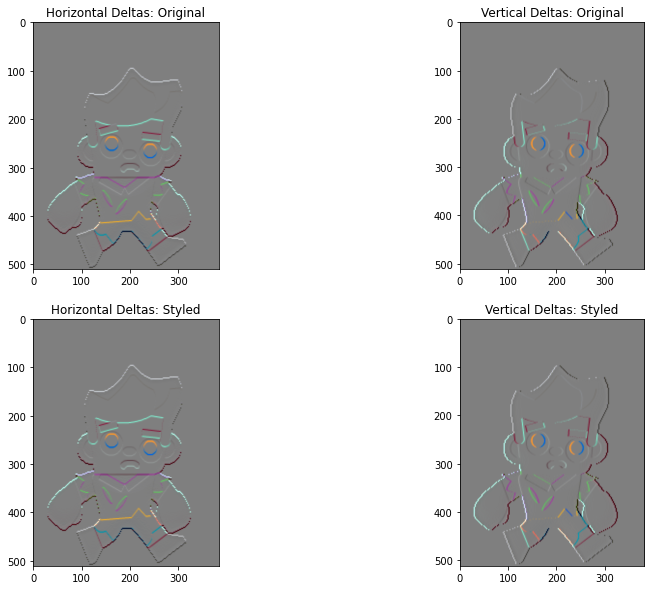

In [ ]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

위 이미지들은 고주파 구성 요소가 늘어났다는 것을 보여줍니다.

한 가지 흥미로운 사실은 고주파 구성 요소가 edge detector의 일종이라는 점입니다. 이를테면 Sobel edge detector를 사용하여 유사한 출력을 얻을 수 있습니다:

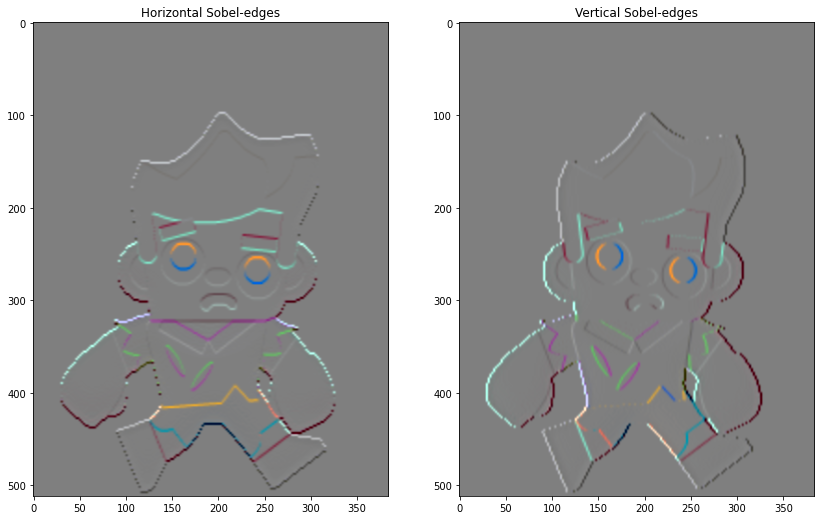

In [ ]:
plt.figure(figsize=(14,10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1,2,1)
imshow(clip_0_1(sobel[...,0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1,2,2)
imshow(clip_0_1(sobel[...,1]/4+0.5), "Vertical Sobel-edges")

정규화 오차는 각 값의 절대값의 합으로 표현됩니다.

In [ ]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [ ]:
total_variation_loss(image).numpy()

5475.967

식이 잘 계산된다는 것을 확인할 수 있습니다. Tensorflow에는 이미 표준 함수가 내장되어 있으므로 직접 오차식을 구현할 필요는 없습니다.

In [ ]:
tf.image.total_variation(image).numpy()

array([5475.967], dtype=float32)

## 다시 최적화하기

`total_variation_loss`를 위한 가중치를 정의합니다.

In [ ]:
total_variation_weight=30

이 가중치를 `train_step` 함수에 사용합니다.

In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

최적화할 변수를 다시 초기화합니다.

In [ ]:
image = tf.Variable(content_image)

최적화를 수행합니다.

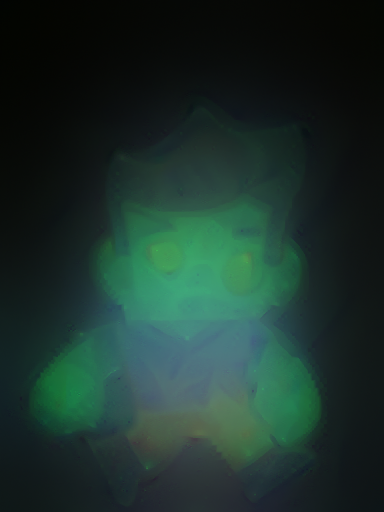

훈련 스텝: 1000
전체 소요 시간: 347.7


In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("훈련 스텝: {}".format(step))

end = time.time()
print("전체 소요 시간: {:.1f}".format(end-start))

최적화 결과물을 저장합니다.

In [ ]:
# ✅로컬 디렉토리에 저장 - tensor object는 opencv로 drive에 바로 저장 불가?
file_name = f'stylized-image{temp_num}.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 배경 제거하기

opencv 라이브러리를 활용하여 기존 이미지로 만든 mask로 최적화된 이미지의 배경을 제거합니다.

(512, 512)


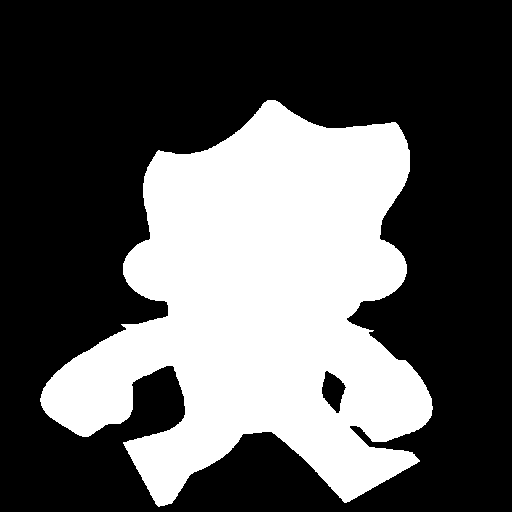

In [ ]:
# mask 만들기
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(f"/content/character_zombie_walk0.png",cv2.IMREAD_UNCHANGED)
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2gray = cv2.resize(img, dsize=(512, 512))
# channel 3: 픽셀 값이 threshold 값("변수 정의"에서 초기화)보다 크면 255로, 아니면 0으로
_, mask = cv2.threshold(img2gray[:,:,3], threshold, 255, cv2.THRESH_BINARY) # ✅1) 3번 채널's 0,1,2 index별 mask 결과가 다른 것인지? 
                                                                            # ✅2) 기존 content image의 B.G 색상이 B냐 W인지 판정 -> THRESH_BINARY or THRESH_BINARY_INV 적용 필요(채널 index에 따라서도 다른듯?)
# mask 확인
print(mask.shape)
cv2_imshow(mask)

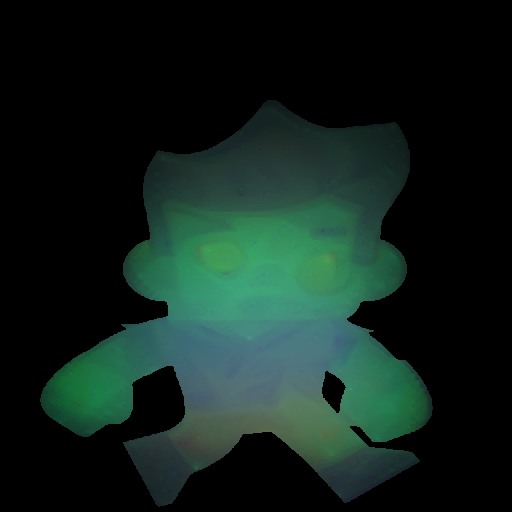

In [ ]:
# transformed에 mask 적용
stylized = cv2.imread(f"/content/stylized-image1.png")
stylized = cv2.resize(stylized, dsize=(512,512)) #✅ size 통일시키기 - 사진 크기에 따른 자동화 필요
stylized = cv2.bitwise_and(stylized, stylized, mask=mask)

# 최종 결과 확인
cv2_imshow(stylized)

## alpha channel(투명도) 추가하기

기존 이미지의 alpha 값을 배경이 제거된 이미지에 추가합니다.

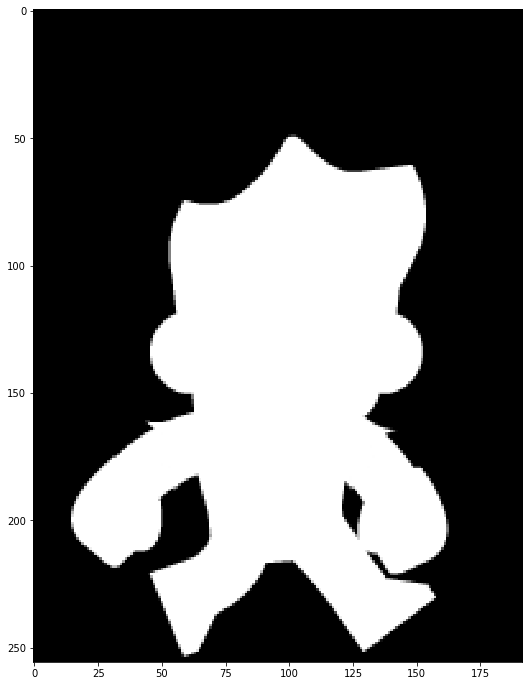

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# 원본 이미지에서 alpha channel 추출
origin_image = img.imread(content_name) # content_name : 원본 이미지 파일 경로

# image 파일의 1st, 2nd channel : 이미지의 x좌표, y 좌표를 의미
# image[:,:,0] : red color index 
# image[:,:,1] : green
# image[:,:,2] : blue
# image[:,:,3] : alpha

# alpha 값이 0이면 완전 투명, 255면 완전 불투명
# gray scale에서 값이 0이면 검정, 255면 흰색 => 배경 부분이 검정색
plt.imshow(origin_image[:,:,3], cmap='gray',interpolation='none')
plt.show()

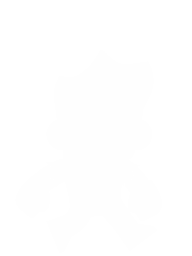

True

In [ ]:
# masking한 이미지 
masked_image = stylized

# masking한 이미지에 채널 추가하기(alpha channel)
rgba = cv2.cvtColor(masked_image, cv2.COLOR_RGB2RGBA) 
rgba = cv2.resize(rgba, dsize=(origin_image.shape[1], origin_image.shape[0])) # ✅ for "TypeError: Expected Ptr<cv::UMat> for argument '%s'" 오류 해결

# 추가한 채널에 원본 이미지의 alpha 값 넣기 
rgba[:, :, 3] = origin_image[:,:,3]
cv2_imshow(rgba)
cv2.imwrite(f"/content/result1.png", rgba) # ✅ 하얀 이미지 출력됨..